<div class="alert alert-info" align="center"><h1>Procedimentos de limpeza e tratamento dos dados</h1><p><span <span  style="color:blue;font:arial; font-size:28px"><b>  </b></span></p></div>

**SECOM** - Secretaria de Comunicação Social do Governo Federal
* Responsável pela comunicação do Governo Federal da Administração Direta como: Ministérios,Secretarias,Empresas Públicas. SECON realiza divulgação em diversos veículos de comunicação das informações de interesse público tais como projetos e políticas de governo visando amplo acesso de interese público.

    
###### Link SECOM para mais informações: http://secom.gov.br  

# Atividades:

**Coluna** `Veículos(Nome Fantasia * Freq/canal)`
*  Descrição do veículo está o CNPJ e deve ser transferido para coluna *`CNPJ Veículo`*.
*  Retira CNPJ.

**Coluna** `CNPJ Veículo`  
*  Retira RCifrão.
*  Transferir CNPJ da coluna `Veículos(Nome Fantasia * Freq/canal)` para coluna `CNPJ Veículo`.
 
**Coluna** `Tipo de campanha`
*  Retira RCifrão.

**Coluna** `Valor`
*  Transferir valores RCifrão da coluna `CNPJ Veículo` para coluna `Valor`.
*  Transferir valores RCifrão da coluna `Tipo de campanha` para coluna `Valor`.
*  Retirar da coluna Valor valores RCifrão , ponto . e substiuir , por ponto . no decimal.

<h1>Dicionário de Dados:</h1>

Abaixo, respectivo significado de cada coluna:

<b>Seq :</b> Sequência numérica em ordem decrescente que identifica a linha dos dados.<br>
<b>Tipo de Entidade :</b> Orgãos do Poder Executivo como: ministérios,secretárias,departamento.<br>
<b>Entidade :</b> Nome da entidade,ministérios,secretárias,departamento de onde partiu solicitação para cobertura de propagando em mídia.<br>
<b>Agência :</b> Nome da agência que executou trabalho de propaganda.<br>
<b>Meio :</b> Meio onde foi vinculado a propaganda: Jornal,Televisão,Rádio,Jornal.<br>
<b>Veículos(Nome Fantasia * Freq/canal) :</b> Descrve o nome do véiculo de comunicação onde foi vinculada a propaganda. Descreve número do canal(Televisão) e Frequência(Rádio/AM/FM).<br>
<b>CNPJ Veículo :</b> CNPJ do veículo de comunicação onde a propaganda foi vinculada.<br>
<b>Tipo de Campanha :</b> Descreve a que se destina a propaganda como: Institucional,Utilidade Pública.<br>
<b>Valor :</b> Valor que foi paga ao veículo de comunicação.<br>

## Importar Bibliotecas.

In [1]:
import pandas as pd
import re

In [2]:
df=pd.read_csv('../data/IAP2002.csv',encoding='utf-8',sep=',',names=['Seq','Tipo de Entidade','Entidade(Abreviado)',
                                                     'Agência','Meio',
                                                     'Veículos(Nome Fantasia * Freq/canal)',
                                                     'CNPJ Veículo','Tipo de Campanha','Valor'])

In [ ]:
print(f'Este dataset possui {df.shape[0]} Linhas e {df.shape[1]} Colunas')
df.head()

## Estatistica de dados e valores totais.

1. total de valores inválidos.

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percentual = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dados_invalidos = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
dados_invalidos.head(20)

,Total,Percentual
CNPJ Veículo,9760,0.354368
Valor,305,0.011074
Tipo de Campanha,0,0.000000
Veículos(Nome Fantasia * Freq/canal),0,0.000000
Meio,0,0.000000
Agência,0,0.000000
Entidade(Abreviado),0,0.000000
Tipo de Entidade,0,0.000000
Seq,0,0.000000


In [15]:
total=df.isnull().sum().sort_values(ascending=False)

2. calcula percentual de valores inválidos

In [16]:
total.head()

CNPJ Veículo                            9760
Valor                                    305
Tipo de Campanha                           0
Veículos(Nome Fantasia * Freq/canal)       0
Meio                                       0
dtype: int64

In [17]:
percentual=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

3. concatena os calculos do total e porcentagem

In [18]:
dados_invalidos = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])

In [19]:
dados_invalidos.head()

,Total,Percentual
CNPJ Veículo,9760,0.354368
Valor,305,0.011074
Tipo de Campanha,0,0.000000
Veículos(Nome Fantasia * Freq/canal),0,0.000000
Meio,0,0.000000


,Total,Percentual
Valor,9738,0.924786
CNPJ Veículo,3696,0.350997
Tipo de Campanha,911,0.086515
Veículos(Nome Fantasia * Freq/canal),0,0.000000
Meio,0,0.000000


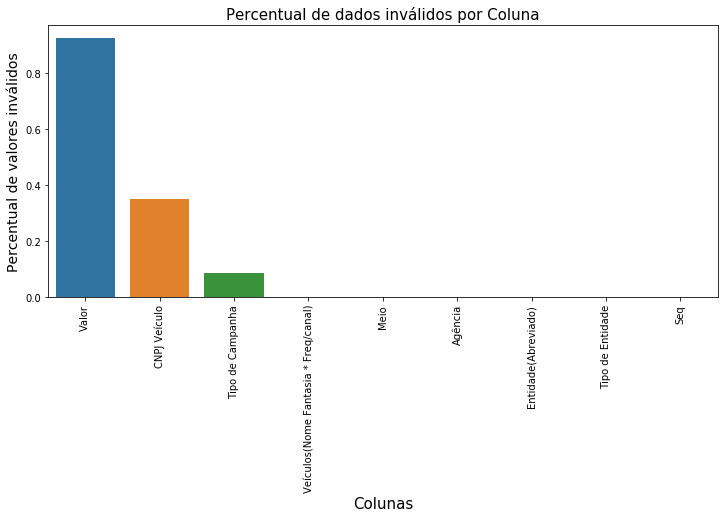

In [19]:
f, ax = plt.subplots(figsize=(12, 5))
plt.xticks(rotation='90')
sn.barplot(x=dados_invalidos.index, y=dados_invalidos['Percentual'])
plt.xlabel('Colunas', fontsize=15)
plt.ylabel('Percentual de valores inválidos', fontsize=14)
plt.title('Percentual de dados inválidos por Coluna', fontsize=15)
dados_invalidos.head()

In [3]:
df.head()

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
0,1,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,INTERNET,TUDO PARANÁ *,76.530.047/0001-29,"R$ 4.605,77",NaN
1,2,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GAZETA MERCANTIL - EDIÇÃO BRASÍLIA *,50.747.732/0019-47,"R$ 396.319,64",NaN
2,3,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,DIÁRIO DO RIO DOCE (EGUSA EDITORA) *,20.599.460/0001-95,"R$ 42.178,99",NaN
3,4,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GENTEESPERTA DE MONTES CLAROS *,16.580.102/0001-63,"R$ 42.167,87",NaN
4,5,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,JJOORRNNAALL DDIAÁMRIOANBTOIQCAUEDIORAP*OVO (P...,18.176.958/0001-01,"R$ 42.167,87",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Seq                                   9294 non-null   int64 
 1   Tipo de Entidade                      9294 non-null   object
 2   Entidade(Abreviado)                   9294 non-null   object
 3   Agência                               9294 non-null   object
 4   Meio                                  9294 non-null   object
 5   Veículos(Nome Fantasia * Freq/canal)  9294 non-null   object
 6   CNPJ Veículo                          6133 non-null   object
 7   Tipo de Campanha                      8501 non-null   object
 8   Valor                                 806 non-null    object
dtypes: int64(1), object(8)
memory usage: 653.6+ KB


# ÁREA DE WORKING ****

In [5]:
df_vlr=df['Tipo de Campanha'].value_counts(dropna=False)

In [6]:
df.isnull().sum()

Seq                                        0
Tipo de Entidade                           0
Entidade(Abreviado)                        0
Agência                                    0
Meio                                       0
Veículos(Nome Fantasia * Freq/canal)       0
CNPJ Veículo                            3161
Tipo de Campanha                         793
Valor                                   8488
dtype: int64

> ## 1. Coluna `Valor`

## Atividades

1. Retirar da coluna `Tipo de Campanha` valores `R$`
2. Substituir na coluna `Tipo de Campanha` os valores `R$`  para vazio.

In [7]:
df_tcp=df[df['Tipo de Campanha'].notnull()]
print(len(df_tcp))

8501


### Extrair os valores monetários substituindo `,` por `.` e retirando `.` no milhar

In [8]:
df_valor=df_tcp['Tipo de Campanha'].str.extract(r'(\d{1,3}(?:\.\d{3})*?,\d{2})').dropna()
#dropna()

lista_valor=[]
for item in df_valor[0]:  
    item=item.replace('.','')
    item=item.replace(',','.')
    lista_valor.append(item)    
    
print(len(lista_valor))    

8488


In [9]:
lista_valor[0:10]

['4605.77',
 '396319.64',
 '42178.99',
 '42167.87',
 '42167.87',
 '42167.87',
 '42167.87',
 '42167.87',
 '156949.22',
 '500783.79']

### Atualiza valores monetários na coluna `Valor`

In [10]:
df.loc[df['Valor'].isnull(), 'Valor'] = lista_valor

### Extrair os valores monetários que já existentes na coluna `Valor`, substituindo `,` por `.` e retirando `.` no milhar

In [11]:
df_valor_df=df['Valor'].str.extract(r'(R\$\s\d{1,3}(?:\.\d{3})*?,\d{2})').dropna()

lista_valor_final=[]
for item in df_valor_df[0]: 
    item=item[0:].replace('.','')
    item=item[0:].replace(',','.')
    lista_valor_final.append(item[3:])    
    
print(len(lista_valor_final))    

806


In [12]:
lista_valor_final[0:10]

['1969.21',
 '4274.56',
 '5919.46',
 '6941.60',
 '3562.14',
 '2137.28',
 '5825.68',
 '12972.33',
 '62872.28',
 '57429.60']

### Atualiza valores monetários já existentes na coluna `Valor`

In [13]:
import warnings
warnings.filterwarnings('ignore', 'This pattern has match groups') 

In [14]:
df.loc[df['Valor'].str.contains(r'(R\$\s\d{1,3}(?:\.\d{3})*?,\d{2})'), 'Valor'] = lista_valor_final

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Seq                                   9294 non-null   int64 
 1   Tipo de Entidade                      9294 non-null   object
 2   Entidade(Abreviado)                   9294 non-null   object
 3   Agência                               9294 non-null   object
 4   Meio                                  9294 non-null   object
 5   Veículos(Nome Fantasia * Freq/canal)  9294 non-null   object
 6   CNPJ Veículo                          6133 non-null   object
 7   Tipo de Campanha                      8501 non-null   object
 8   Valor                                 9294 non-null   object
dtypes: int64(1), object(8)
memory usage: 653.6+ KB


In [16]:
df.iloc[100:150]

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
100,101,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"PARAÍSO FM - 96,1 * FM",01.776.936/0001-71,"R$ 633,94",633.94
101,102,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,DIFUSORA AM - 640 * AM,01.542.182/0002-76,"R$ 2.252,14",2252.14
102,103,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"TERRA FM - 104,3 * FM",24.862.997/0001-57,"R$ 1.276,21",1276.21
103,104,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"ATIVIDADE- 98,1 (RÁDIO CLUBE) * FM",02.098.303/0001-14,"R$ 2.740,11",2740.11
104,105,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,CULTURA AM - 790 * AM,06.764.963/0001-48,"R$ 4.557,69",4557.69
105,106,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,JAINARA - 1030 * AM,05.289.707/0001-83,"R$ 9.613,14",9613.14
106,107,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,RIO BALSAS - 1090 * AM,11.319.043/0001-50,"R$ 2.283,42",2283.42
107,108,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,GUAJAJARA 540 AM * AM,13.903.196/0001-76,"R$ 9.252,55",9252.55
108,109,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,ALECRIM AM - 1230 * AM,00.293.892/0001-66,"R$ 3.187,67",3187.67
109,110,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,MIRANTE AM - 1520 * AM,11.282.910/0001-20,"R$ 2.148,24",2148.24


In [17]:
df['Valor'].head(10)

0      4605.77
1    396319.64
2     42178.99
3     42167.87
4     42167.87
5     42167.87
6     42167.87
7     42167.87
8    156949.22
9    500783.79
Name: Valor, dtype: object

### Converte coluna `Valor` para tipo de dados float

In [18]:
df['Valor']=df['Valor'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Seq                                   9294 non-null   int64  
 1   Tipo de Entidade                      9294 non-null   object 
 2   Entidade(Abreviado)                   9294 non-null   object 
 3   Agência                               9294 non-null   object 
 4   Meio                                  9294 non-null   object 
 5   Veículos(Nome Fantasia * Freq/canal)  9294 non-null   object 
 6   CNPJ Veículo                          6133 non-null   object 
 7   Tipo de Campanha                      8501 non-null   object 
 8   Valor                                 9294 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 653.6+ KB


### Imprime total de goastos no formato moeda R$

In [20]:
def real_br_mascara(soma_total):
    a = '{:,.2f}'.format(float(soma_total))
    b = a.replace(',','v')
    c = b.replace('.',',')
    return c.replace('v','.')

In [22]:
soma_total=df["Valor"].sum() 
print ('Total gasto no Ano de 2002 foi : R$ {}'.format(real_br_mascara(soma_total)))

Total gasto no Ano de 2002 foi : R$ 1.445.793.954,65


1. Gravr df_valor com a seguinte condicional  `df[df['Tipo de Campanha'].notnull()]`. Irá gravar todos os registros da coluna `Tipo de Campanha` que contém valores monetários. 

In [23]:
df.loc[pd.isnull(df['Tipo de Campanha'])]

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
119,120,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"MIRANTE - 100,3 * FM",63.425.458/0001-02,NaN,1969.21
120,121,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,VANGUARDA * AM,10.433.613/0001-76,NaN,4274.56
121,122,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,BOA ESPERANÇA AM - 1450 * AM,11.785.052/0001-37,NaN,5919.46
122,123,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,CAPITAL - 1180 * AM,10.288.876/0001-39,NaN,6941.60
123,124,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,JAINARA - 1030 * AM,05.289.707/0001-83,NaN,3562.14
...,...,...,...,...,...,...,...,...,...
7988,7989,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,"UNIVERSIDADE FM - 106,9 * FM",07.060.718/0001-12,NaN,8719.40
7989,7990,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,REDE GOIÂNIA DE RÁDIO * AM,02.866.095/0001-56,NaN,12144.88
7990,7991,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,"ANTENA FM - 93,3 * FM",14.969.711/0001-83,NaN,10322.31
7991,7992,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,CBN AM - 590 * AM,03.925.138/0001-90,NaN,4290.75


In [24]:
df[df['Tipo de Campanha']== 'nan']

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor


> ## 1. Coluna `Tipo de Campanha`.

## Atividades

1. Retirar da coluna `Tipo de Campanha` valores `R$`
2. Substituir na coluna `Tipo de Campanha` valores `NaN` para vazio.

In [25]:
df[df['Tipo de Campanha'].isnull()]

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
119,120,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"MIRANTE - 100,3 * FM",63.425.458/0001-02,NaN,1969.21
120,121,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,VANGUARDA * AM,10.433.613/0001-76,NaN,4274.56
121,122,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,BOA ESPERANÇA AM - 1450 * AM,11.785.052/0001-37,NaN,5919.46
122,123,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,CAPITAL - 1180 * AM,10.288.876/0001-39,NaN,6941.60
123,124,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,JAINARA - 1030 * AM,05.289.707/0001-83,NaN,3562.14
...,...,...,...,...,...,...,...,...,...
7988,7989,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,"UNIVERSIDADE FM - 106,9 * FM",07.060.718/0001-12,NaN,8719.40
7989,7990,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,REDE GOIÂNIA DE RÁDIO * AM,02.866.095/0001-56,NaN,12144.88
7990,7991,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,"ANTENA FM - 93,3 * FM",14.969.711/0001-83,NaN,10322.31
7991,7992,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,CBN AM - 590 * AM,03.925.138/0001-90,NaN,4290.75


In [246]:
df[df['Tipo de Campanha'].notnull()]

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
0,1,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,INTERNET,TUDO PARANÁ *,76.530.047/0001-29,"R$ 4.605,77",4605.77
1,2,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GAZETA MERCANTIL - EDIÇÃO BRASÍLIA *,50.747.732/0019-47,"R$ 396.319,64",396319.64
2,3,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,DIÁRIO DO RIO DOCE (EGUSA EDITORA) *,20.599.460/0001-95,"R$ 42.178,99",42178.99
3,4,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GENTEESPERTA DE MONTES CLAROS *,16.580.102/0001-63,"R$ 42.167,87",42167.87
4,5,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,JJOORRNNAALL DDIAÁMRIOANBTOIQCAUEDIORAP*OVO (P...,18.176.958/0001-01,"R$ 42.167,87",42167.87
5,6,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,EOMJOPRRENSAAL)D*E CARATINGA - A VERDADE DOS,18.273.011/0001-00,"R$ 42.167,87",42167.87
6,7,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,FATOS *,19.319.946/0001-43,"R$ 42.167,87",42167.87
7,8,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,VALE DO AÇO *,06.814.502/0001-32,"R$ 42.167,87",42167.87
8,9,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GAZETA MERCANTIL *,04.485.665/0001-93,"R$ 156.949,22",156949.22
9,10,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,VALOR ECONÔMICO *,03.687.592/0001-50,"R$ 500.783,79",500783.79


In [26]:
df['Tipo de Campanha'].str.extract('(R\$\s\d{1,3}(?:\.\d{3})*?,\d{2})',expand=True).head(10)

,0
0,"R$ 4.605,77"
1,"R$ 396.319,64"
2,"R$ 42.178,99"
3,"R$ 42.167,87"
4,"R$ 42.167,87"
5,"R$ 42.167,87"
6,"R$ 42.167,87"
7,"R$ 42.167,87"
8,"R$ 156.949,22"
9,"R$ 500.783,79"


In [27]:
def retira(valor):
    return re.sub(r'(R\$\s\d{1,3}(?:\.\d{3})*?,\d{2})', ' ', str(valor))

In [28]:
df['Tipo de Campanha']=df['Tipo de Campanha'].apply(retira)

In [29]:
df[df['Tipo de Campanha'].isnull()]

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor


In [30]:
df.iloc[159]

Seq                                                       160
Tipo de Entidade                         ADMINISTRAÇÃO DIRETA
Entidade(Abreviado)                          MIN. DA EDUCAÇÃO
Agência                                                  ADAG
Meio                                                    RÁDIO
Veículos(Nome Fantasia * Freq/canal)    FM LÍDER - 100,5 * FM
CNPJ Veículo                               10.752.269/0001-88
Tipo de Campanha                            UTILIDADE PÚBLICA
Valor                                                  730.69
Name: 159, dtype: object

### Retira string `nan` da coluna `Tipo de Campanha`

In [31]:
df[df['Tipo de Campanha']== 'nan']

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
119,120,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"MIRANTE - 100,3 * FM",63.425.458/0001-02,nan,1969.21
120,121,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,VANGUARDA * AM,10.433.613/0001-76,nan,4274.56
121,122,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,BOA ESPERANÇA AM - 1450 * AM,11.785.052/0001-37,nan,5919.46
122,123,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,CAPITAL - 1180 * AM,10.288.876/0001-39,nan,6941.60
123,124,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,JAINARA - 1030 * AM,05.289.707/0001-83,nan,3562.14
...,...,...,...,...,...,...,...,...,...
7988,7989,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,"UNIVERSIDADE FM - 106,9 * FM",07.060.718/0001-12,nan,8719.40
7989,7990,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,REDE GOIÂNIA DE RÁDIO * AM,02.866.095/0001-56,nan,12144.88
7990,7991,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,"ANTENA FM - 93,3 * FM",14.969.711/0001-83,nan,10322.31
7991,7992,SOCIEDADE DE ECONOMIA MISTA,ELETRONORTE,DNA,RÁDIO,CBN AM - 590 * AM,03.925.138/0001-90,nan,4290.75


### Substituir `nan` por espaço vazio `' '`

In [32]:
df['Tipo de Campanha']=df['Tipo de Campanha'].replace('nan','')

In [33]:
df[df['Tipo de Campanha']== 'nan']

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Seq                                   9294 non-null   int64  
 1   Tipo de Entidade                      9294 non-null   object 
 2   Entidade(Abreviado)                   9294 non-null   object 
 3   Agência                               9294 non-null   object 
 4   Meio                                  9294 non-null   object 
 5   Veículos(Nome Fantasia * Freq/canal)  9294 non-null   object 
 6   CNPJ Veículo                          6133 non-null   object 
 7   Tipo de Campanha                      9294 non-null   object 
 8   Valor                                 9294 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 653.6+ KB


> ## 1. Coluna CNPJ Veículos.

## Coluna Veículos

* Registros `NaN` da coluna `CNPJ Veículo` são registros de CNPJ que estão agrupados na coluna
`Veículos(Nome Fantasia * Freq/canal`, ou seja, registros de CNPJ que deveriam estar na coluna `CNPJ Veículos` estão agrupados na coluna `Veículos(Nome Fantasia * Freq/canal`. Por este motivo existem `Nan`.
* Retira da culuna `Veículos(Nome Fantasia * Freq/canal` CNPJ que pertencem a coluna `CNPJ Veículo`.

## Atividades:
1. Criar um subset df_veiculo somente com registros `NaN` da coluna CNPJ Veículos.
2. Criar um subset df_cnpj apartir do subset df_veiculos somente com registros onde estão CNPJ
agrupados na coluna `Veículos(Nome Fantasia * Freq/canal`.
3. Transforma o subset `df_cnpj` em uma lista.
4. Com o subset df_cnpj trasformado em uma lista, será atualizado a coluna `CNPJ Veículo` somente nos registros com `NaN`.	
5. Validar coluna `'CNPJ Veículo` após atualização para correção de registros `NaN`.

### 1. Criar subset  `df_veiculo`

In [35]:
df_veiculo=df[df['CNPJ Veículo'].isnull()]

### 2. Criar subset `df_cnpj`

In [36]:
df_cnpj=df_veiculo['Veículos(Nome Fantasia * Freq/canal)'].str.extract(r'([0-9]\d\.[0-9]\d\d\.[0-9]\d\d\/\d+\-\d\d)')

In [37]:
df_cnpj[0:10]

,0
181,10.624.930/0001-70
182,11.999.463/0001-25
183,11.457.256/0001-49
184,09.045.758/0001-10
185,07.199.664/0004-13
186,11.349.800/0001-39
187,09.014.580/0001-40
188,11.996.667/0002-93
189,10.280.022/0001-06
190,08.042.210/0001-54


### 3. Trasforma subset df_cnpj em uma lista.

In [38]:
lista_cnpj=[]

for item in df_cnpj[0]:
    lista_cnpj.append(item)
print(f'SIZE : {len(lista_cnpj)}')

SIZE : 3161


In [39]:
lista_cnpj[0:10]

['10.624.930/0001-70',
 '11.999.463/0001-25',
 '11.457.256/0001-49',
 '09.045.758/0001-10',
 '07.199.664/0004-13',
 '11.349.800/0001-39',
 '09.014.580/0001-40',
 '11.996.667/0002-93',
 '10.280.022/0001-06',
 '08.042.210/0001-54']

### 4. Atualiza coluna `CNPJ Veículo`

In [40]:
df.loc[df['CNPJ Veículo'].isnull(), 'CNPJ Veículo'] = lista_cnpj

In [41]:
df.head(200)

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
0,1,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,INTERNET,TUDO PARANÁ *,76.530.047/0001-29,,4605.77
1,2,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GAZETA MERCANTIL - EDIÇÃO BRASÍLIA *,50.747.732/0019-47,,396319.64
2,3,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,DIÁRIO DO RIO DOCE (EGUSA EDITORA) *,20.599.460/0001-95,,42178.99
3,4,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,GENTEESPERTA DE MONTES CLAROS *,16.580.102/0001-63,,42167.87
4,5,ADMINISTRAÇÃO DIRETA,MIN. DA AGRICULTURA,LINK,JORNAL,JJOORRNNAALL DDIAÁMRIOANBTOIQCAUEDIORAP*OVO (P...,18.176.958/0001-01,,42167.87
...,...,...,...,...,...,...,...,...,...
195,196,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,INGAZEIRA AM - 1470 * AM 07.455.413/0001-00,07.455.413/0001-00,,1424.85
196,197,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,DESIFPUERSOANRAÇAAMAM- 9-28050* -AEMX GRANDE P...,06.619.548/0001-09,,3562.14
197,198,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,"LAIMDERANÇA FM - 94,5 - EX GRANDE PICOS FM * 0...",06.850.333/0001-96,,3196.79
198,199,ADMINISTRAÇÃO DIRETA,MIN. DA EDUCAÇÃO,ADAG,RÁDIO,FM 06.850.333/0001-96,06.850.333/0001-96,,3836.15


### 5. Valida coluna

In [42]:
df[df['CNPJ Veículo'].isnull()]

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Seq                                   9294 non-null   int64  
 1   Tipo de Entidade                      9294 non-null   object 
 2   Entidade(Abreviado)                   9294 non-null   object 
 3   Agência                               9294 non-null   object 
 4   Meio                                  9294 non-null   object 
 5   Veículos(Nome Fantasia * Freq/canal)  9294 non-null   object 
 6   CNPJ Veículo                          9294 non-null   object 
 7   Tipo de Campanha                      9294 non-null   object 
 8   Valor                                 9294 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 653.6+ KB


### 6. Retida da culuna `Veículos(Nome Fantasia * Freq/canal)` cnpj

In [44]:
def retira(valor):
    return re.sub(r'([0-9]\d\.[0-9]\d\d\.[0-9]\d\d\/\d+\-\d\d)', ' ', str(valor))

In [45]:
df['Veículos(Nome Fantasia * Freq/canal)']=df['Veículos(Nome Fantasia * Freq/canal)'].apply(retira)

In [46]:
df.tail(50)

,Seq,Tipo de Entidade,Entidade(Abreviado),Agência,Meio,Veículos(Nome Fantasia * Freq/canal),CNPJ Veículo,Tipo de Campanha,Valor
9244,9245,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,REVISTA,GUIA COMERCIAL DE SÃO GONÇALO *,01.684.721/0001-20,,13902.11
9245,9246,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,REVISTA,AGENDA BRASIL *,00.985.967/0001-70,,16004.10
9246,9247,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,CNT CURITIBA * 6,77.237.733/0001-79,,411891.61
9247,9248,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE BANDEIRANTES * 13,60.509.239/0001-13,,3020616.88
9248,9249,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE GLOBO *,27.865.757/0033-81,,21833093.87
9249,9250,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE MTV (BAIXADO) *,01.294.481/0001-58,,593617.17
9250,9251,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE MULHER (REDE MULHER) *,02.344.518/0001-78,,19796.60
9251,9252,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE PÚBLICA DE TV *,96.434.063/0001-25,,275751.06
9252,9253,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE RECORD *,60.628.369/0001-75,,6538444.66
9253,9254,SOCIEDADE DE ECONOMIA MISTA,PETROBRAS,PPR,TELEVISÃO,REDE SBT *,45.039.237/0001-14,,6189850.06


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9294 entries, 0 to 9293
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Seq                                   9294 non-null   int64  
 1   Tipo de Entidade                      9294 non-null   object 
 2   Entidade(Abreviado)                   9294 non-null   object 
 3   Agência                               9294 non-null   object 
 4   Meio                                  9294 non-null   object 
 5   Veículos(Nome Fantasia * Freq/canal)  9294 non-null   object 
 6   CNPJ Veículo                          9294 non-null   object 
 7   Tipo de Campanha                      9294 non-null   object 
 8   Valor                                 9294 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 653.6+ KB


In [391]:
df.to_excel('IAP2002FINAL.xlsx')